In [1]:
import numpy as np
import random
from keras import layers, models
from keras.datasets import cifar100
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [3]:
# Load and preprocess the CIFAR-100 dataset
(train_images, train_labels), (test_images, test_labels) = cifar100.load_data()
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels, num_classes=100)
test_labels = to_categorical(test_labels, num_classes=100)

datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True, vertical_flip=True)

In [4]:
# Build the neural network model
model = models.Sequential()
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
#model.add(layers.Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
#model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(100, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

ValueError: Exception encountered when calling layer "max_pooling2d_2" (type MaxPooling2D).

Negative dimension size caused by subtracting 2 from 1 for '{{node max_pooling2d_2/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 2, 2, 1], padding="VALID", strides=[1, 2, 2, 1]](Placeholder)' with input shapes: [?,1,1,128].

Call arguments received by layer "max_pooling2d_2" (type MaxPooling2D):
  • inputs=tf.Tensor(shape=(None, 1, 1, 128), dtype=float32)

In [12]:
# Build the neural network model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.4))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(100, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
# Train the model
gen_train_images = datagen.flow(train_images, train_labels, batch_size=200)

history = model.fit(gen_train_images, epochs=50, validation_data=(test_images, test_labels)) #10 -> 34%

Epoch 1/50
250/250 [==============================] - 57s 225ms/step - loss: 4.4411 - accuracy: 0.0578 - val_loss: 4.2699 - val_accuracy: 0.0546
Epoch 2/50
250/250 [==============================] - 55s 222ms/step - loss: 3.7782 - accuracy: 0.1186 - val_loss: 3.3864 - val_accuracy: 0.1874
Epoch 3/50
250/250 [==============================] - 54s 218ms/step - loss: 3.4675 - accuracy: 0.1658 - val_loss: 3.1564 - val_accuracy: 0.2224
Epoch 4/50
250/250 [==============================] - 55s 219ms/step - loss: 3.2498 - accuracy: 0.2020 - val_loss: 2.9923 - val_accuracy: 0.2471
Epoch 5/50
250/250 [==============================] - 55s 221ms/step - loss: 3.0810 - accuracy: 0.2325 - val_loss: 2.8208 - val_accuracy: 0.2832
Epoch 6/50
250/250 [==============================] - 54s 217ms/step - loss: 2.9629 - accuracy: 0.2525 - val_loss: 2.6635 - val_accuracy: 0.3094
Epoch 7/50
250/250 [==============================] - 55s 219ms/step - loss: 2.8631 - accuracy: 0.2719 - val_loss: 2.6395 - val_ac

313/313 [==============================] - 5s 16ms/step - loss: 2.5420 - accuracy: 0.3451
Test accuracy: 0.3450999855995178


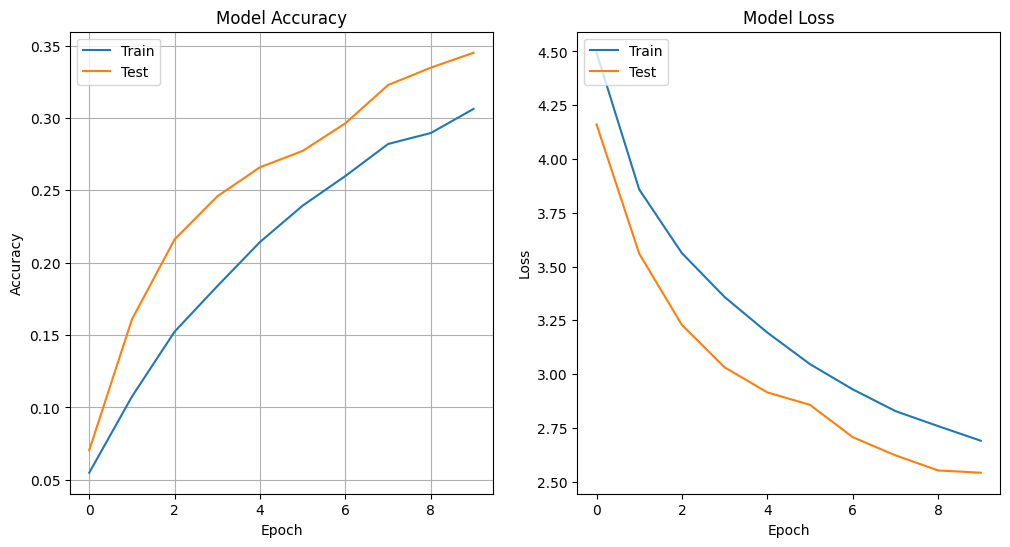

In [7]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

# Plot training history (accuracy and loss over epochs)
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()


In [10]:
# Define the classes in CIFAR-10 (for labeling purposes)
cifar10_classes = [
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
]

# Define the classes in CIFAR-100 (for labeling purposes)
cifar100_classes = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle',
    'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle',
    'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard',
    'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain',
    'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree',
    'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket',
    'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider',
    'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor',
    'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm'
]

# Function to plot a grid of example images
def plot_example_images(images, labels, classes, num_examples=5):
    plt.figure(figsize=(8, 8))

    rand_offset = random.randint(0, 5000)

    for i in range(num_examples * num_examples):
        plt.subplot(num_examples, num_examples, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i+rand_offset])
        # Find the index of the class with the maximum probability
        class_index = np.argmax(labels[i+rand_offset])
        plt.xlabel(classes[class_index], fontsize=8)
    plt.show()



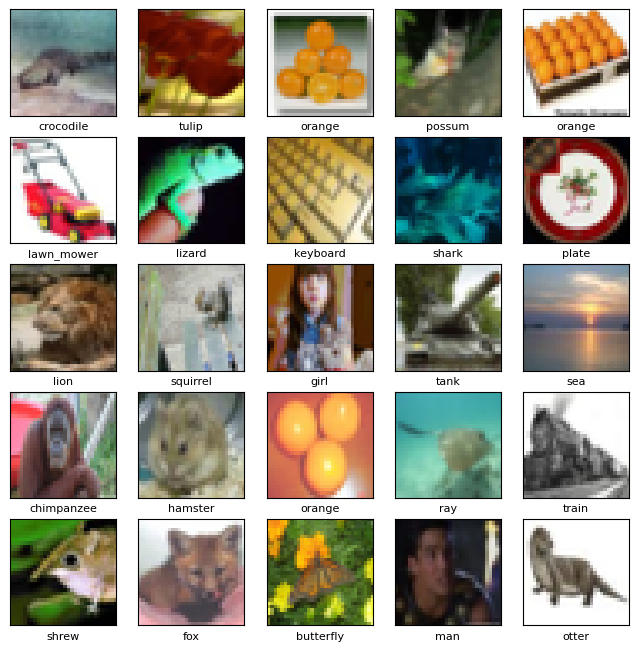

In [11]:
# Plot a grid of example images with actual labels
plot_example_images(train_images, train_labels, cifar100_classes, num_examples=5)

313/313 [==============================] - 5s 15ms/step


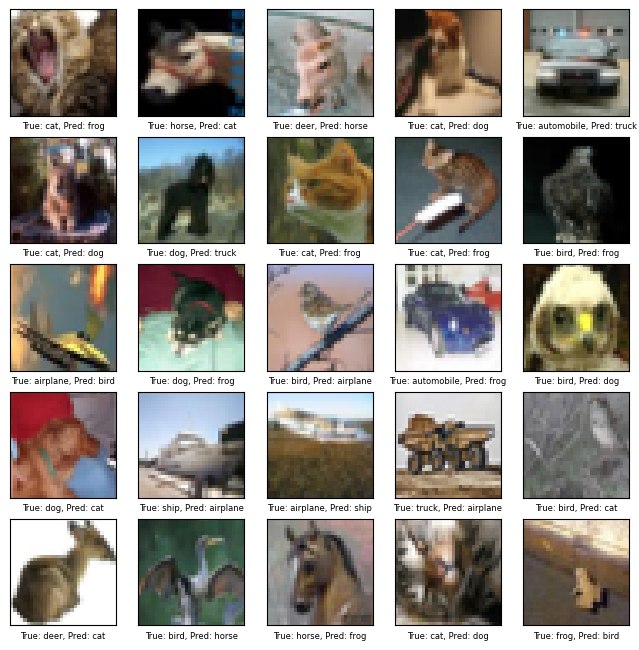

In [ ]:
predictions = model.predict(test_images)

# Function to plot correctly detected example images
def plot_correctly_detected(images, true_labels, predicted_labels, classes, num_examples=5):
    correctly_detected_indices = np.where(np.argmax(predicted_labels, axis=1) != np.argmax(true_labels, axis=1))[0]

    rand_offset = random.randint(0, 20)

    plt.figure(figsize=(8, 8))
    for i in range(num_examples * num_examples):
        plt.subplot(num_examples, num_examples, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)

        index = correctly_detected_indices[i+rand_offset]
        plt.imshow(images[index])
        
        true_label = np.argmax(true_labels[index])
        predicted_label = np.argmax(predicted_labels[index])
        
        plt.xlabel(f'True: {classes[true_label]}, Pred: {classes[predicted_label]}', fontsize=6)

    plt.show()

# Plot correctly detected example images
plot_correctly_detected(test_images, test_labels, predictions, cifar10_classes, num_examples=5)